# 데이터 전처리 간단 실습

## 데이터 준비

In [1]:
# 생선의 길이(도미+빙어)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 생선의 무게(도미+빙어)
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
# numpy를 사용해 2차원 리스트 만들기
fish_data = np.column_stack((fish_length, fish_weight))

In [4]:
# target data 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# sklearn의 train_test_split 함수를 사용해 데이터 나누기
# 나누는 비율 default 값은 25%(0.25)
train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, random_state=42)

## 모델 훈련하기

In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

## 이상값 발견

In [8]:
# 도미 데이터를 넣고 확인해 본 결과 빙어로 예측
print(kn.predict([[25, 150]]))

[0.]


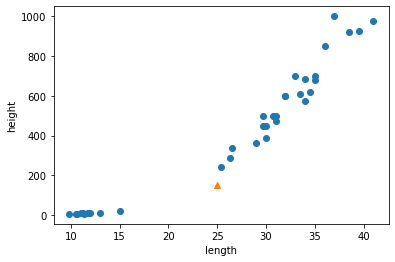

In [9]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

### 새로운 데이터가 도미 데이터에 가까워 보이는데
### 빙어로 예측하고 있음

In [10]:
# kneighbors() method를 사용해 이웃과의 거리와 index 반환
distances,  indexes = kn.kneighbors([[25, 150]])

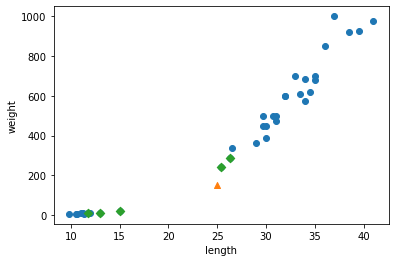

In [11]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
print(train_target[indexes])
# 가까운 이웃에 도미가 2마리 빙어가 3마리로 예측
# 1 : 도미, 0 : 빙어

[[1. 0. 0. 1. 0.]]


#### 두 특성의 스케일이 다르기 때문에 이런 문제가 발생하고 있습니다
#### x축과 y축의 범위를 일정한 기준으로 맞추어 주어 문제를 해결할 수 있습니다
#### 표준점수를 사용하는 Z-점수 정규화를 사용해 해결해보겠습니다

In [13]:
# numpy에서 제공하는 함수를 사용
# (36,2) 크기의 배열이기 때문에 axis=0으로 각 특성별로 계산
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [14]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [15]:
# Z-점수 정규화 식 적용
# numpy 기능의 브로드캐스팅을 사용해 모든 행 계산
train_scaled = (train_input - mean) / std

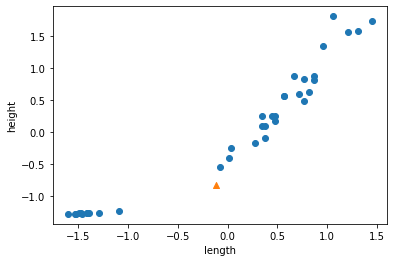

In [16]:
new = ([25, 150] - mean) / std # 새로운 데이터도 정규화 진행
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

### x축과 y축의 범위가 일정 범위로 바뀐 것을 확인

## 정규화된 데이터로 모델 훈련

In [17]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [18]:
# test data도 똑같이 정규화 진행
test_scaled = (test_input - mean) / std

In [19]:
kn.score(test_scaled, test_target)

1.0

In [20]:
# 새로운 data가 도미로 예측 성공
print(kn.predict([new]))

[1.]


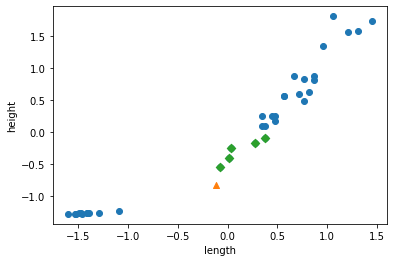

In [21]:
idstances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

### 가장 가까운 샘플이 모두 도미로 변한것을 확일할 수 있다.